# WOS 批量论文自动化分析 - 新版

In [12]:
import pandas as pd
from utils import DataClean, KeywordsCount, WordCloudDraw
import tencent_translate

## 1 数据预处理

In [13]:
inputFile1 = '../data/input/savedrecs.xls'
outputFile1 = DataClean().core_select(inputFile1)
# 检查清洗数据
df = pd.read_excel(outputFile1)
df.columns

Index(['Title', 'Source', 'Keywords', 'WOS_Keywords', 'Abstract', 'Addresses',
       'Affiliations', 'Cited', 'Publication_Year', 'DOI', 'WOS_Categories',
       'Research_Areas'],
      dtype='object')

## 2 词频统计

In [14]:
inputFile2 = outputFile1
outputFile2 = KeywordsCount().words_count(inputFile2)

## 3 腾讯云机器翻译

In [15]:
# source_file = outputFile2
# target_file = "../data/output/test_tranlate_counts.xlsx"
# keywords_tranlate(source_file, "原文标题", target_file, "标题翻译")

In [16]:
inputFile3 = outputFile2
outputFile3 = "../data/output/keyword_translate_counts.xlsx"
tencent_translate.translate_results(inputFile3, "Keyword", outputFile3)

## 4 词云图模块

### 4.1 关键词词云绘制

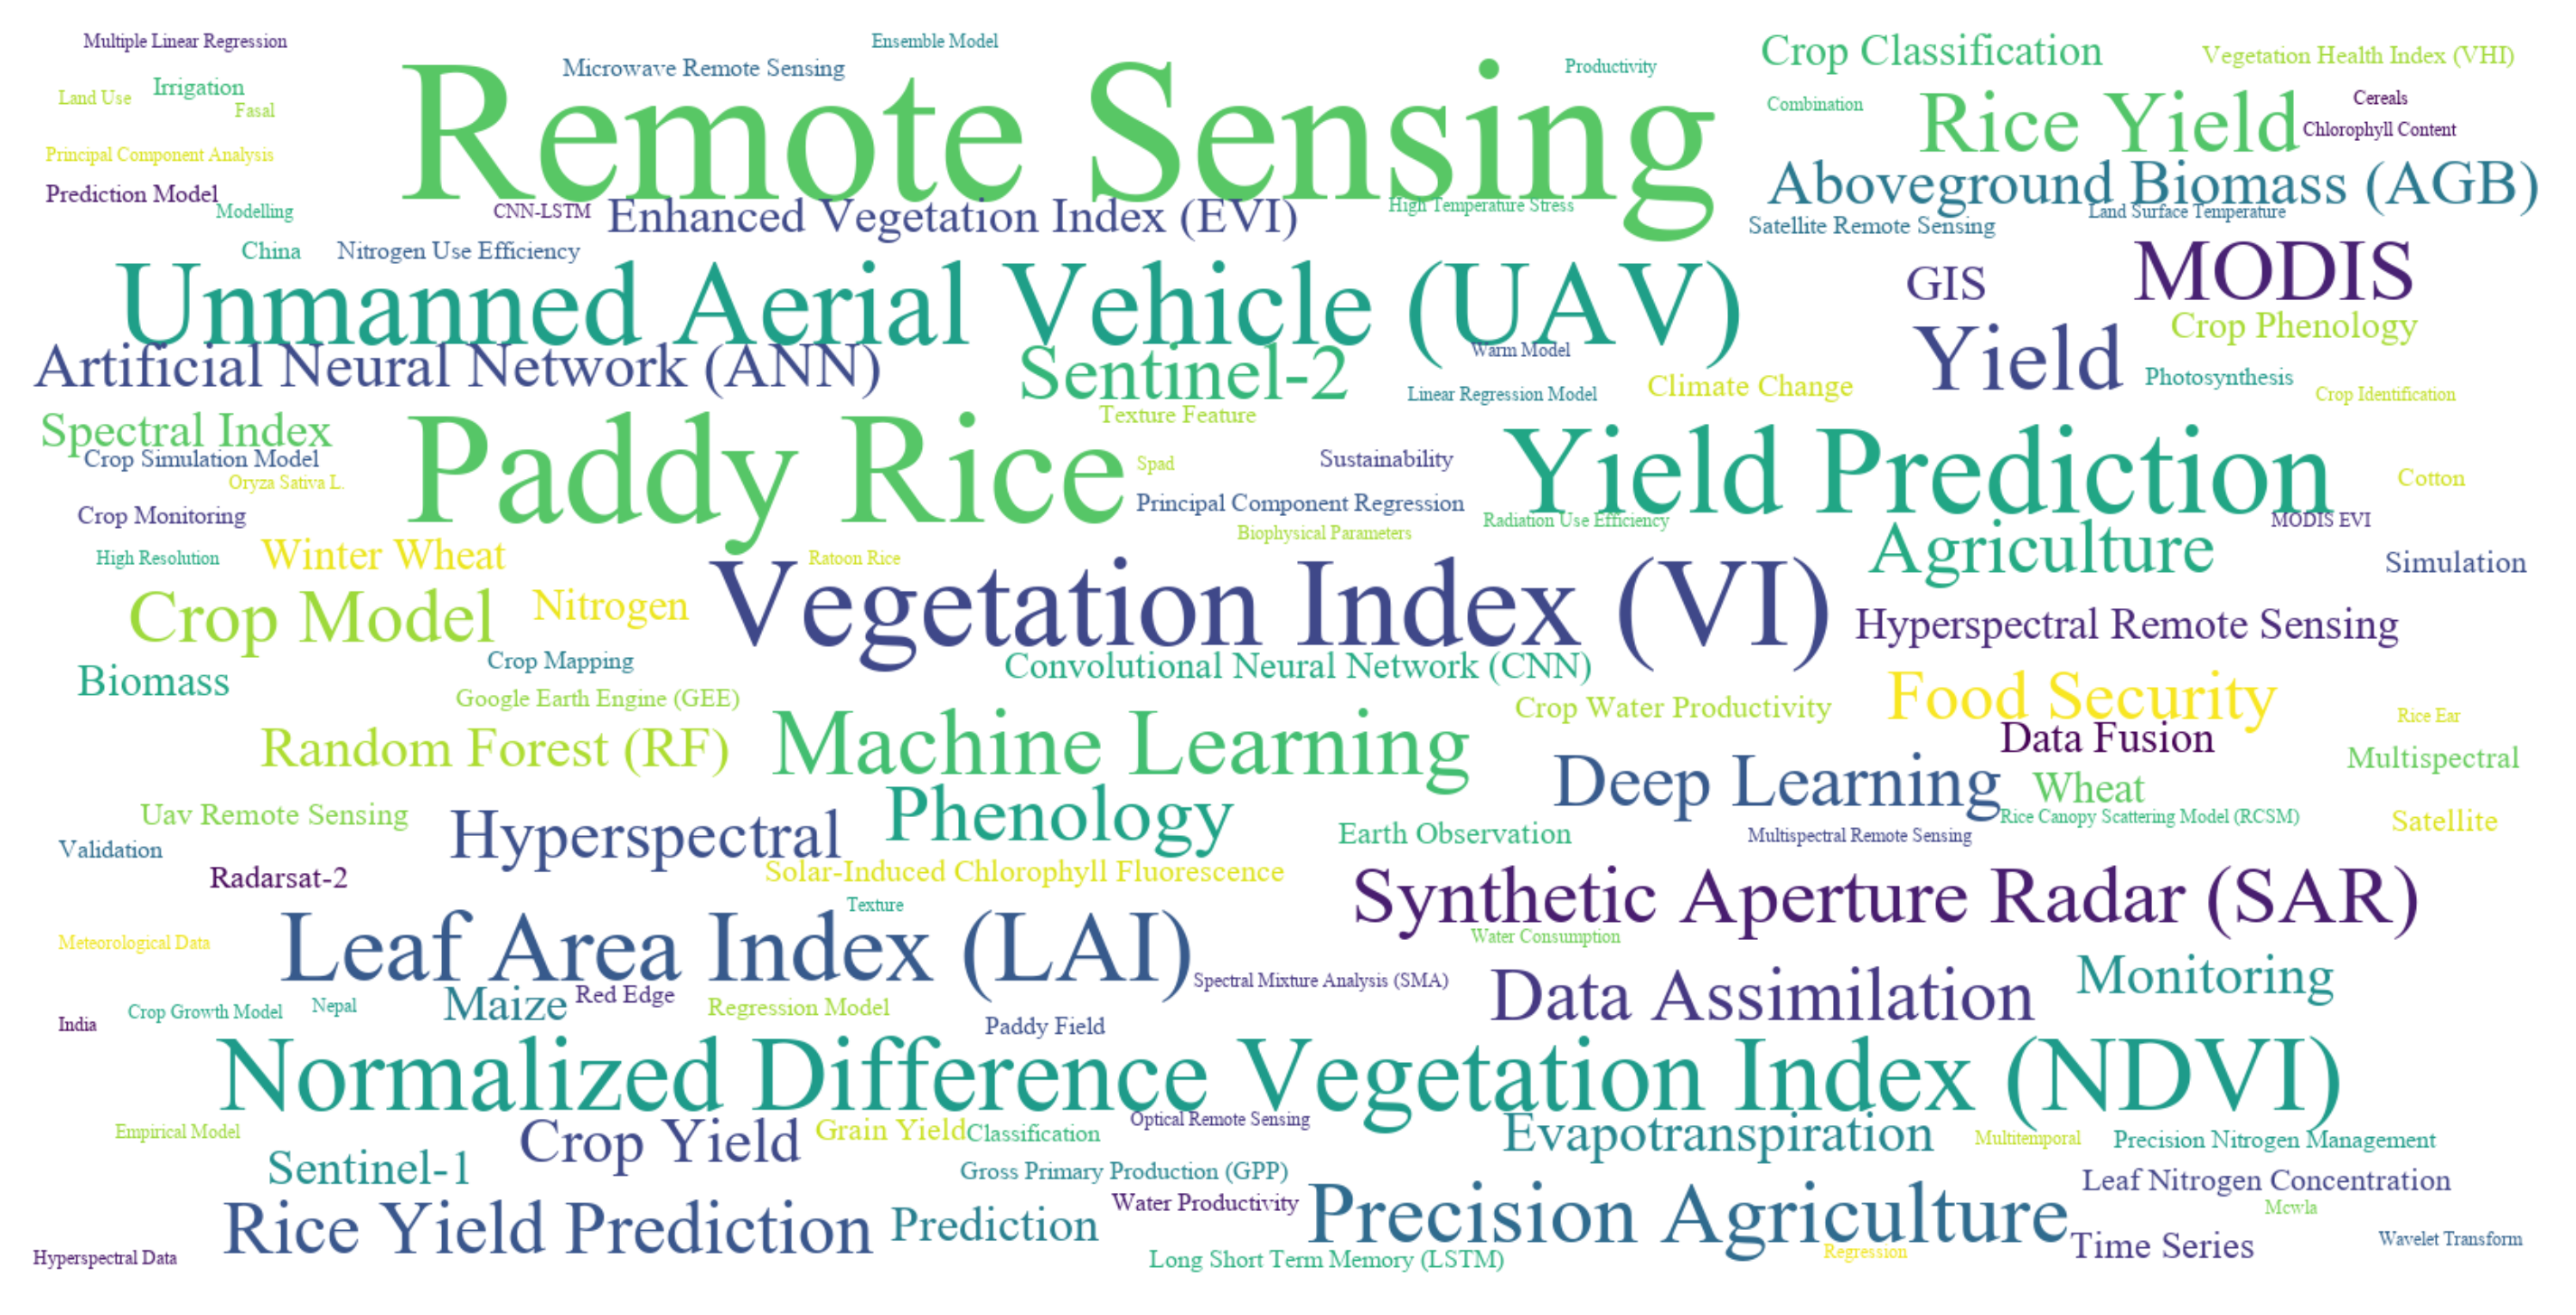

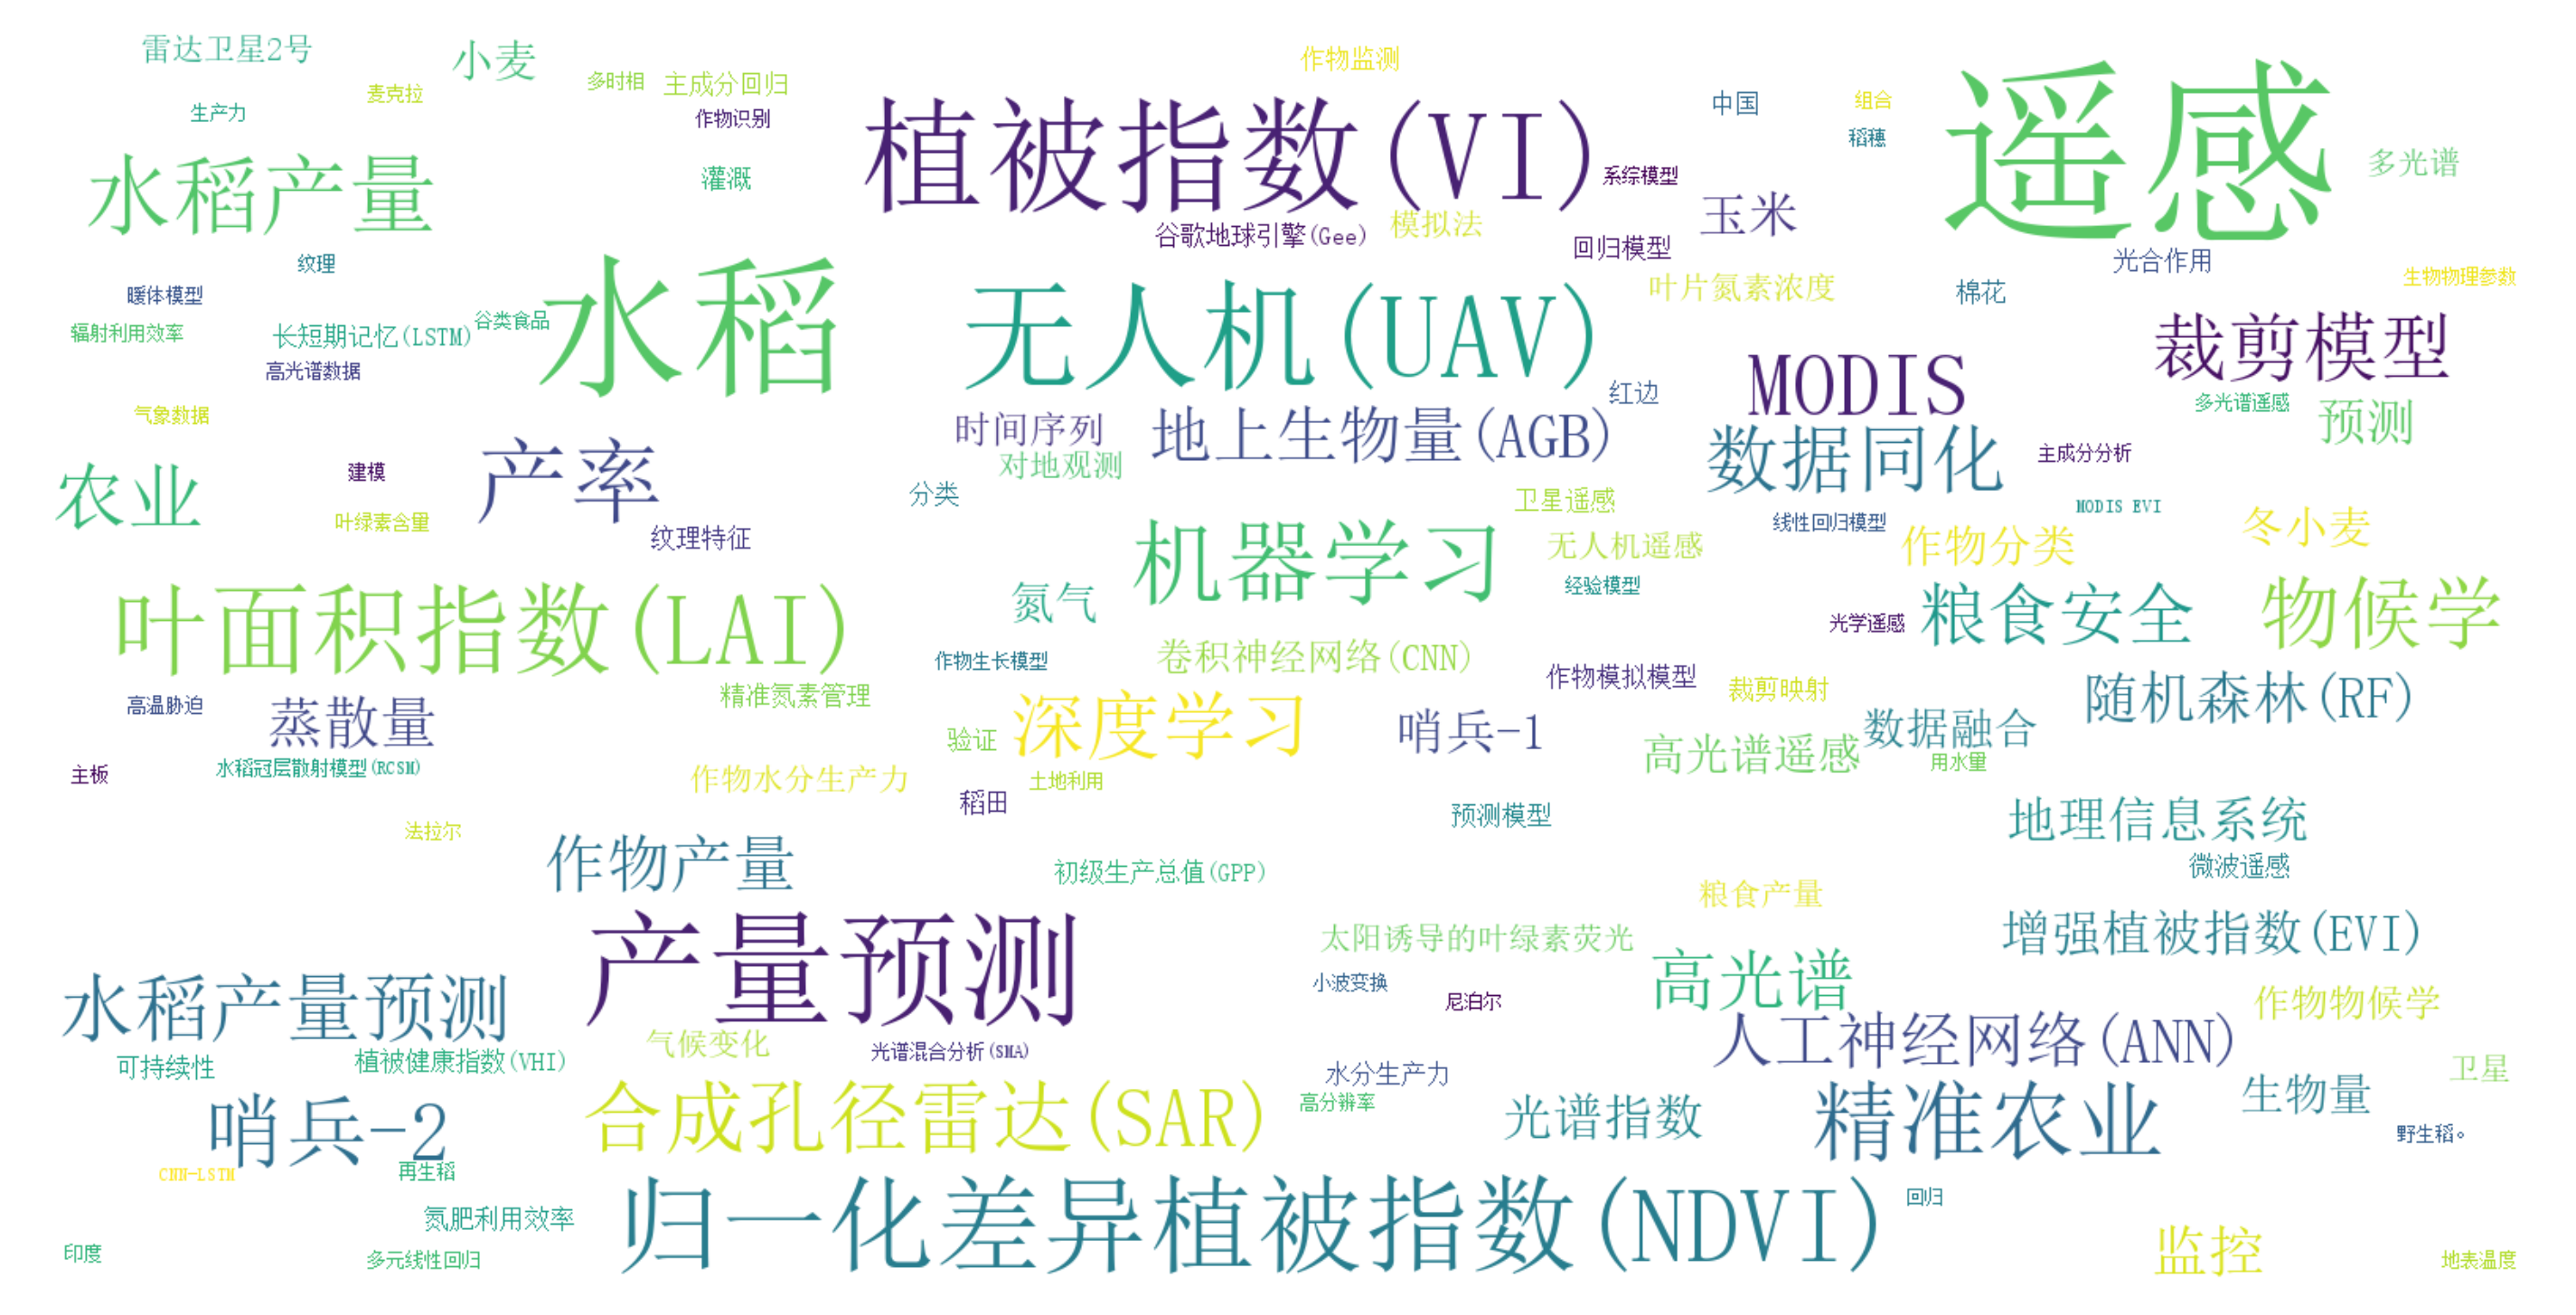

In [17]:
from utils import WordCloudDraw as keywordCloud
# 不翻译仅绘制英文词云
WordCloudDraw().plt_wordcloud(outputFile2)
# 翻译后的词云
WordCloudDraw().plt_wordcloud(outputFile3, lang='zh')